In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer

In [9]:
df = pd.read_csv("/Users/mymac/Documents/Data Science Bootcamp/Week 10 - Data Profiling/EDA - Case study/Financial Dataset - 1.csv")

In [10]:
df.head()

country  year    uniqueid Has a Bank account Type of Location  \
0   Kenya  2018  uniqueid_1                Yes            Rural   
1   Kenya  2018  uniqueid_2                 No            Rural   
2   Kenya  2018  uniqueid_3                Yes            Urban   
3   Kenya  2018  uniqueid_4                 No            Rural   
4   Kenya  2018  uniqueid_5                 No            Urban   

  Cell Phone Access  household_size  Respondent Age gender_of_respondent  \
0               Yes             3.0            24.0               Female   
1                No             5.0            70.0               Female   
2               Yes             5.0            26.0                 Male   
3               Yes             5.0            34.0               Female   
4                No             8.0            26.0                 Male   

  The relathip with head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

               Level of Educuation                Type of Job  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

In [11]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [13]:
df.drop(columns=['uniqueid'], axis=1, inplace=True)

In [14]:
df.head()

country  year Has a Bank account Type of Location Cell Phone Access  \
0   Kenya  2018                Yes            Rural               Yes   
1   Kenya  2018                 No            Rural                No   
2   Kenya  2018                Yes            Urban               Yes   
3   Kenya  2018                 No            Rural               Yes   
4   Kenya  2018                 No            Urban                No   

   household_size  Respondent Age gender_of_respondent The relathip with head  \
0             3.0            24.0               Female                 Spouse   
1             5.0            70.0               Female      Head of Household   
2             5.0            26.0                 Male         Other relative   
3             5.0            34.0               Female      Head of Household   
4             8.0            26.0                 Male                  Child   

            marital_status              Level of Educuation  \
0  Married/Living together              Secondary education   
1                  Widowed              No formal education   
2     Single/Never Married  Vocational/Specialised training   
3  Married/Living together                Primary education   
4     Single/Never Married                Primary education   

                 Type of Job  
0              Self employed  
1       Government Dependent  
2              Self employed  
3  Formally employed Private  
4        Informally employed

In [16]:
df.isnull().sum()

country                   14
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [18]:
np.round(df.isnull().sum()*100/len(df), 2)

country                   0.06
year                      0.00
Has a Bank account        0.15
Type of Location          0.06
Cell Phone Access         0.05
household_size            0.12
Respondent Age            0.14
gender_of_respondent      0.14
The relathip with head    0.02
marital_status            0.14
Level of Educuation       0.12
Type of Job               0.13
dtype: float64

In [21]:
df['household_size'].fillna(df['household_size'].median(), inplace=True)
# df['household_size']

In [22]:
df['Respondent Age'].fillna(df['Respondent Age'].mean(), inplace=True)
# df['Respondent Age']

In [25]:
imputer = SimpleImputer(strategy="most_frequent")
data = np.array(df['Type of Job'], dtype=object).reshape(-1,1)
imputer.fit_transform(data)

array([['Self employed'],
       ['Government Dependent'],
       ['Self employed'],
       ...,
       ['Other Income'],
       ['Self employed'],
       ['No Income']], dtype=object)

In [26]:
data = np.array(df['Level of Educuation'], dtype=object).reshape(-1,1)
imputer.fit_transform(data)

array([['Secondary education'],
       ['No formal education'],
       ['Vocational/Specialised training'],
       ...,
       ['Primary education'],
       ['Secondary education'],
       ['Secondary education']], dtype=object)

In [27]:
data = np.array(df['marital_status'], dtype=object).reshape(-1,1)
imputer.fit_transform(data)

array([['Married/Living together'],
       ['Widowed'],
       ['Single/Never Married'],
       ...,
       ['Widowed'],
       ['Divorced/Seperated'],
       ['Single/Never Married']], dtype=object)

In [30]:
# the firt index gives the most frequent one
df['Type of Location'].value_counts()

Rural    14338
Urban     9171
Name: Type of Location, dtype: int64

In [32]:
df['Type of Location'].value_counts().index[0]

'Rural'

In [33]:
# filling the remaining cells with most common class
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df

country  year Has a Bank account Type of Location Cell Phone Access  \
0       Kenya  2018                Yes            Rural               Yes   
1       Kenya  2018                 No            Rural                No   
2       Kenya  2018                Yes            Urban               Yes   
3       Kenya  2018                 No            Rural               Yes   
4       Kenya  2018                 No            Urban                No   
...       ...   ...                ...              ...               ...   
23519  Uganda  2018                 No            Rural               Yes   
23520  Uganda  2018                 No            Rural               Yes   
23521  Uganda  2018                 No            Rural               Yes   
23522  Uganda  2018                 No            Urban               Yes   
23523  Uganda  2018                 No            Rural               Yes   

       household_size  Respondent Age gender_of_respondent  \
0                 3.0            24.0               Female   
1                 5.0            70.0               Female   
2                 5.0            26.0                 Male   
3                 5.0            34.0               Female   
4                 8.0            26.0                 Male   
...               ...             ...                  ...   
23519             4.0            48.0               Female   
23520             2.0            27.0               Female   
23521             5.0            27.0               Female   
23522             7.0            30.0               Female   
23523            10.0            20.0                 Male   

      The relathip with head           marital_status  \
0                     Spouse  Married/Living together   
1          Head of Household                  Widowed   
2             Other relative     Single/Never Married   
3          Head of Household  Married/Living together   
4                      Child     Single/Never Married   
...                      ...                      ...   
23519      Head of Household       Divorced/Seperated   
23520      Head of Household     Single/Never Married   
23521                 Parent                  Widowed   
23522                 Parent       Divorced/Seperated   
23523                  Child     Single/Never Married   

                   Level of Educuation                Type of Job  
0                  Secondary education              Self employed  
1                  No formal education       Government Dependent  
2      Vocational/Specialised training              Self employed  
3                    Primary education  Formally employed Private  
4                    Primary education        Informally employed  
...                                ...                        ...  
23519              No formal education               Other Income  
23520              Secondary education               Other Income  
23521                Primary education               Other Income  
23522              Secondary education              Self employed  
23523              Secondary education                  No Income  

[23524 rows x 12 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23524 non-null  object 
 1   year                    23524 non-null  int64  
 2   Has a Bank account      23524 non-null  object 
 3   Type of Location        23524 non-null  object 
 4   Cell Phone Access       23524 non-null  object 
 5   household_size          23524 non-null  float64
 6   Respondent Age          23524 non-null  float64
 7   gender_of_respondent    23524 non-null  object 
 8   The relathip with head  23524 non-null  object 
 9   marital_status          23524 non-null  object 
 10  Level of Educuation     23524 non-null  object 
 11  Type of Job             23524 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.2+ MB


In [35]:
# if still missing any values
df.dropna(inplace=True, axis=0)

In [36]:
df.duplicated().sum()

4397

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
# printing unique values for each column
for i in df.columns:
    print(i, df[i].nunique())

country 4
year 6
Has a Bank account 2
Type of Location 2
Cell Phone Access 2
household_size 21
Respondent Age 86
gender_of_respondent 2
The relathip with head 6
marital_status 5
Level of Educuation 7
Type of Job 10


In [39]:
df['gender_of_respondent'].value_counts()

Female    11399
Male       7728
Name: gender_of_respondent, dtype: int64

<AxesSubplot: xlabel='gender_of_respondent', ylabel='count'>

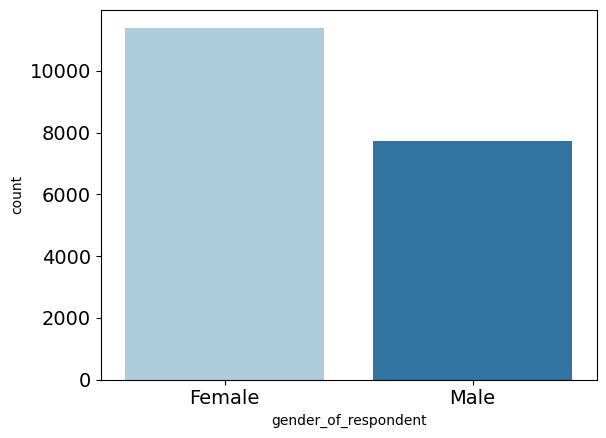

In [42]:
plt.tick_params(axis='both', which='major', labelsize=14)
sns.countplot(x=df['gender_of_respondent'], palette='Paired')

<AxesSubplot: xlabel='Type of Job', ylabel='count'>

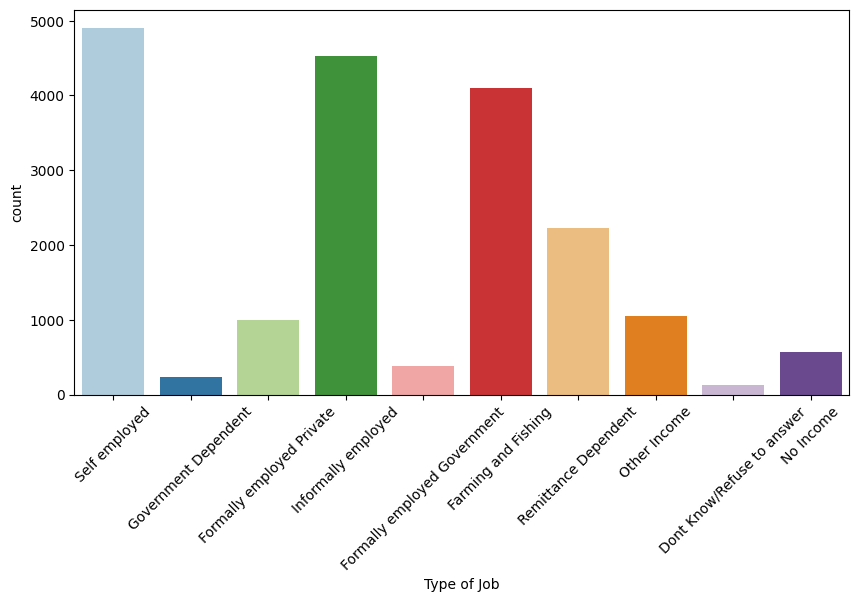

In [50]:
plt.figure(figsize=(10,5))
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=45)
sns.countplot(x = df['Type of Job'], palette='Paired')

In [51]:
df['country'].value_counts()

Rwanda      6705
Kenya       5617
Tanzania    4830
Uganda      1975
Name: country, dtype: int64

In [52]:
df['Level of Educuation'].value_counts()

Primary education                  9500
No formal education                3905
Secondary education                3824
Tertiary education                 1085
Vocational/Specialised training     779
6                                    26
Other/Dont know/RTA                   8
Name: Level of Educuation, dtype: int64

<AxesSubplot: xlabel='country', ylabel='count'>

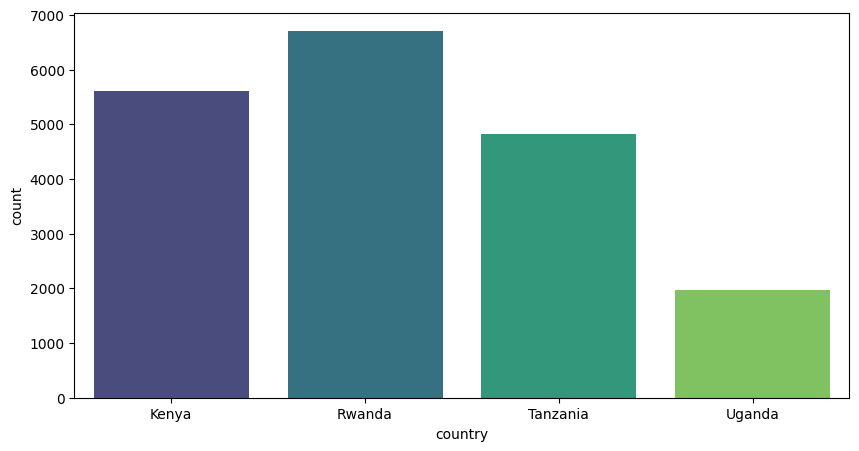

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['country'], palette='viridis')

In [ ]:
fig = px.pie(df, names='country', labels={'country':'Country'}, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [64]:
df['marital_status'].value_counts()

Married/Living together    8704
Single/Never Married       6059
Widowed                    2403
Divorced/Seperated         1953
Dont know                     8
Name: marital_status, dtype: int64

<Figure size 2000x1000 with 0 Axes>

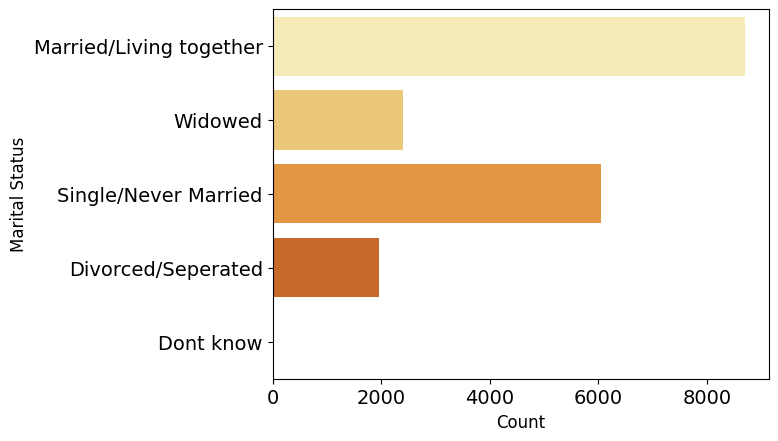

<Figure size 2000x1000 with 0 Axes>

In [71]:
sns.countplot(y = df['marital_status'], palette='YlOrBr')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Marital Status', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.figure(figsize=(20,10))

In [ ]:
fig = px.pie(df, names='The relathip with head', labels={'The relathip with head':'Relationship with Head'}, color_discrete_sequence=px.colors.sequential.Oryel_r)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
px.histogram(y = df['Level of Educuation'])

In [75]:
df['Type of Job'].value_counts()

Self employed                   4902
Informally employed             4528
Farming and Fishing             4099
Remittance Dependent            2227
Other Income                    1050
Formally employed Private       1003
No Income                        573
Formally employed Government     378
Government Dependent             241
Dont Know/Refuse to answer       126
Name: Type of Job, dtype: int64

In [76]:
df['The relathip with head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [77]:
fig = px.histogram(df, x="Respondent Age")
fig.show()

In [85]:
fig = px.histogram(x = df['Type of Location'])
fig.update_layout(bargap=0.8)
fig.update_xaxes(tickfont_size=12, ticks='outside', ticklen=10, tickwidth=10)
fig.show()

In [86]:
df['Cell Phone Access'].value_counts()

Yes    14126
No      5001
Name: Cell Phone Access, dtype: int64

In [90]:
# sns.countplot(x = df['Cell Phone Access'])
fig = px.histogram(df['Cell Phone Access'])
fig.show()

In [94]:
pivot_cell_phone = pd.pivot_table(data=df, index='Respondent Age', values = 'Has a Bank account', columns='Cell Phone Access', fill_value=0, aggfunc='count')
pivot_cell_phone

Cell Phone Access   No  Yes
Respondent Age             
16.0               204  175
17.0               179  217
18.0               192  302
19.0               104  305
20.0               144  379
...                ...  ...
96.0                 3    0
97.0                 1    0
98.0                 5    1
99.0                 1    1
100.0                5    0

[86 rows x 2 columns]

<AxesSubplot: xlabel='Respondent Age'>

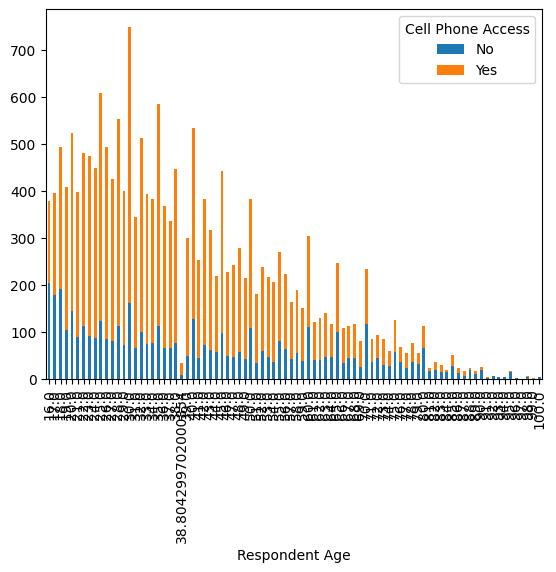

In [97]:
pivot_cell_phone.plot(kind='bar', stacked=True)

<AxesSubplot: xlabel='country', ylabel='count'>

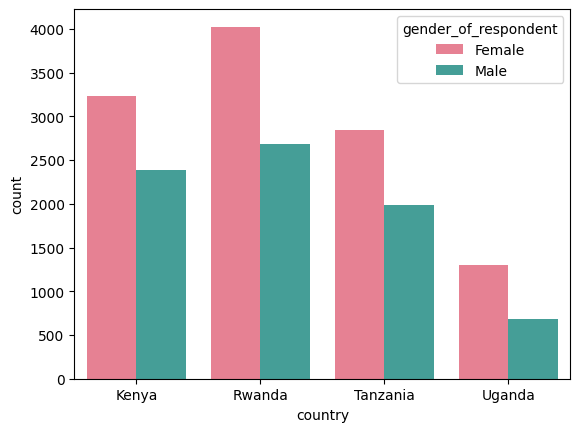

In [99]:
sns.countplot(x=df['country'], hue=df['gender_of_respondent'], palette='husl')

In [100]:
df.corr()

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_57590/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



year  household_size  Respondent Age
year            1.000000       -0.025914       -0.035316
household_size -0.025914        1.000000       -0.124926
Respondent Age -0.035316       -0.124926        1.000000

<AxesSubplot: xlabel='country', ylabel='count'>

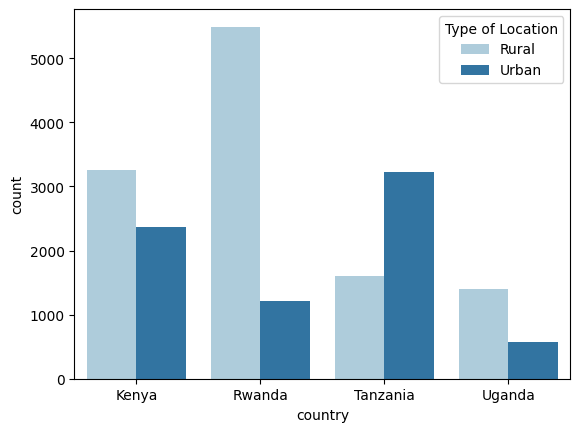

In [102]:
sns.countplot(x = df['country'], hue = df['Type of Location'], palette = 'Paired')

In [103]:
df['Respondent Age'].describe()

count    19127.000000
mean        39.530744
std         17.054963
min         16.000000
25%         26.000000
50%         36.000000
75%         50.000000
max        100.000000
Name: Respondent Age, dtype: float64

In [104]:
fig = px.scatter(df, x = df['Respondent Age'], color='Respondent Age')
fig.show()